In this project, I wil use the MNIST dataset for handwritten digits that is commonly used for training and testing in the field of machine learning and computer vision. The dataset contains 60,000 training images and 10,000 test images of handwritten digits from 0 to 9, each image is 28x28 pixels in size.

# Libs

Usually, with custom dataste we will have to download the dataset and imported but because MNIST is well-know dataset in computer vision fiels, Keras team included it as part of their frmaework. 

In [73]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

from keras.datasets import mnist #download dataset from Keras framework
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Load Data

In [36]:
#load data to our project, x is sample"image" while y is label
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
(x_train[0], y_train[0])

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [37]:
#shape will help us understand the structure of our dataset
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(60000, 28, 28) means we have 60,000 images, each image has size of 28*28. In another words, each image has height of 28 and width of 28

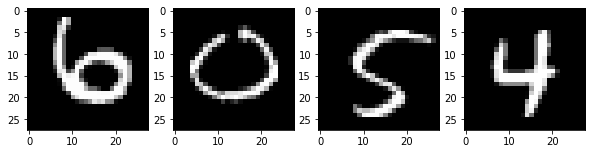

In [38]:
#show random images from the dataste
fig, ax = plt.subplots(1, 4, figsize=(10, 10))
for i in range(0,4):
  random_number = np.random.randint(0, len(x_test))
  img = x_test[random_number]
  ax[i].imshow(img, cmap='gray')

## Reshap Data

Keras needs data to be defined as following (number_of_samples, rows, columns, depth).

- for RGB images, that would be like (60000, 28, 28,3)
- for balck and white image, that would be (60000, 28, 28,1)


Note: Grayscale image has 1 for channel




In [39]:
img_row = x_train[0].shape[0] # from first record, get the height of image 
img_col = x_train[0].shape[1]  # from first record, get the width of image 

In [40]:
x_train = x_train.reshape(x_train.shape[0], img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1)

In [41]:
input_shape = (img_row, img_col, 1)
input_shape

(28, 28, 1)

In [42]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Transform

we divided by 255 to normalize images, so its value would be between 0 and 1

In [43]:
x_train = x_train / 255
x_test = x_test / 255

## One-hot encoding

In [45]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [46]:
num_classes = y_test.shape[1]
num_classes

10

In [49]:
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels # 28 * 28

784

## Build Model

Using Keras, you can build your model from scratch either in Sequential approach or Functional one. Here, I will use the former as it easier to implement,

In [51]:
model = tf.keras.Sequential()

In [52]:
model.add(tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [53]:
model.compile(loss ="categorical_crossentropy", optimizer= 'SGD', metrics =['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        5824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [55]:
batch_size = 32
epochs = 6

In [56]:
#train the model
history = model.fit(x_train,y_train,batch_size= batch_size,epochs = epochs,verbose=1,validation_data= (x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 115s 61ms/step - loss: 0.5665 - accuracy: 0.8222 - val_loss: 0.1924 - val_accuracy: 0.9421
Epoch 2/6
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2737 - accuracy: 0.9191 - val_loss: 0.1294 - val_accuracy: 0.9616
Epoch 3/6
1875/1875 [==============================] - 112s 60ms/step - loss: 0.1959 - accuracy: 0.9419 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 4/6
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1499 - accuracy: 0.9554 - val_loss: 0.0721 - val_accuracy: 0.9776
Epoch 5/6
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1262 - accuracy: 0.9627 - val_loss: 0.0594 - val_accuracy: 0.9805
Epoch 6/6
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1095 - accuracy: 0.9666 - val_loss: 0.0504 - val_accuracy: 0.9829


In [57]:
#evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', score[0])
print('Test_accuracy:', score[1])

Test_loss: 0.05043616145849228
Test_accuracy: 0.9829000234603882


In [58]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values

[0.19240383803844452,
 0.12940730154514313,
 0.09186761826276779,
 0.07206578552722931,
 0.05943756178021431,
 0.05043616145849228]

In [59]:
loss_values

[0.5664671659469604,
 0.2737037241458893,
 0.19586952030658722,
 0.14994889497756958,
 0.12616735696792603,
 0.10953810065984726]

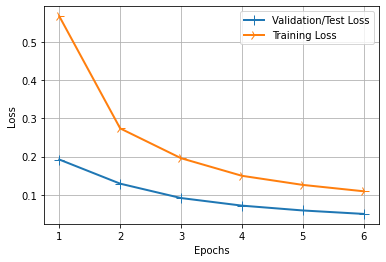

In [60]:
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


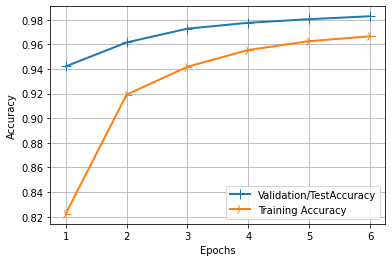

In [67]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/TestAccuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [68]:
model.save("./mnist.h5")

# Visualize the model Structure

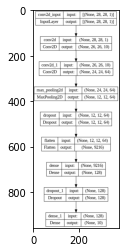

In [74]:
plot_model(model, to_file='model.png',
          show_shapes= True,
          show_layer_names = True)
img = mpimg.imread('model.png')
plt.imshow(img)
plt.show()
